In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show

#讀取json檔案
df4 = pd.read_json("./data/線別客運量.json")  
#抓取所需欄位
df4 = df4.drop(["總計","年度","電子票證","網路付款","郵局及超商"], axis=1)
year = np.arange(2005,2016,1)
lst = list(df4)     #columns
l = len(df4)        #rows
df4_1 = df4.drop(["縱貫線"],axis=1)    #扣除縱貫線
lst2 = list(df4_1)

In [3]:
def main():
    while True:
        try:
            menu()
            choice = input("請選擇欲查詢項目:")
            print()
            if choice == 'A':
                while True:
                    try:
                        menuA()
                        choiceType = input("請選擇圖形:")
                        print()
                        if choiceType == "A1":
                            pltAllLines()
                            plt.show()
                            input("請按任意鍵返回選單")
                        elif choiceType == "A2":
                            while True:
                                menuYears()
                                global choiceYear
                                choiceYear = int(input("請選擇年份:"))
                                print()
                                if choiceYear >= 1 and choiceYear <= l:
                                    pltAllBars()
                                    plt.show()
                                    input("請按任意鍵返回選單")
                                elif choiceYear == 0:
                                    break
                                else:
                                    print("請輸入1~{}查詢! 按任意鍵繼續..".format(l))
                                    input("")
                        
                        elif choiceType == "A3":
                            while True:
                                menuYears()
                                choiceYear = int(input("請選擇年份:"))
                                print()
                                if choiceYear >= 1 and choiceYear <= l:
                                    pltAllPies()
                                    plt.show()
                                    input("請按任意鍵返回選單")
                                elif choiceYear == 0:
                                    break
                                else:
                                    print("請輸入1~{}查詢! 按任意鍵繼續..".format(l))
                                    input("")
                        elif choiceType == '0':
                            break
                        else:
                            print("請輸入A1~A3查詢! 按任意鍵繼續..")
                            input("")
                    except ValueError:
                        print("\n請輸入正確的選項! 按任意鍵繼續..")
                        input("")
            elif choice == 'B':
                while True:
                    menuB()
                    global choiceLine
                    choiceLine = int(input("請選擇:"))
                    print()
                    if choiceLine >= 1 and choiceLine <= len(lst):
                        pltEachLine()
                        plt.show()
                        input("請按任意鍵返回選單")
                    elif choiceLine == 0:
                        break
                    else:
                        print("請輸入1~{}查詢! 按任意鍵繼續..".format(len(lst)))
                        input("")
                        
            elif choice == '0':
                print("返回總目錄\n")
                break
            else:
                print("請輸入A或B查詢! 按任意鍵繼續..")
                input("")
        except ValueError:
            print("\n請輸入正確的選項! 按任意鍵繼續..")
            input("")

In [4]:
def menu():
    print("---台鐵各線歷年客運量資訊---")
    print("A.台鐵各線歷年客運量統計(2005~2015年)")
    print("B.台鐵個別線歷年客運量統計(2005~2015年)")
    print("0.返回總目錄")

In [5]:
def menuA():
    print("---------------0.返回上一層------------------")
    print("A1.折線圖")
    print("A2.長條圖")
    print("A3.圓餅圖") 

In [6]:
def menuYears():
    print("---------------0.返回上一層------------------")
    for i in range(l):
        print("{:2d}. {}年".format(i+1,year[i]),end=" ")
        if (i+1)%4 == 0:
            print()

In [7]:
def pltAllLines():
    plt.subplot(121)
    p = figure(title="台鐵各線歷年客運量統計(2005~2015年)",
               x_axis_label="年",y_axis_label="客運量(百萬)")
    lstColor = ['aqua','grey','darkgreen','blue','brown','chartreuse','chocolate','coral','darkblue','coral','fuchsia','red','green']
    for i in range(len(lst)):
        p.line(year,df4[lst[i]]/10000000,line_width=3,color=lstColor[i],legend=lst[i])
        p.circle(year,df4[lst[i]]/10000000,size=2,color='black')
    p.background_fill_color="azure"
    p.outline_line_width=8
    p.outline_line_color="darkblue"
    show(p)
    plt.subplot(122)
    lstColor2 = ['aqua','azure','darkgreen','b','brown','chartreuse','chocolate','coral','darkblue','fuchsia','r','g']
    for i, color in enumerate(lstColor2,start=0):
        plt.plot(year,df4_1[lst2[i]]/10000000,lw=3,color=color)
    plt.legend(lst2,shadow=True,fontsize='x-large',frameon=False) 
    plt.title("台鐵各線歷年客運量統計(扣除縱貫線)(2005~2015年)",size=20)
    plt.xlabel("年",size=16)
    plt.ylabel("客運量(百萬)",size=16)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

In [8]:
def pltAllBars():
    plt.figure(figsize=(20,12))
    plt.subplot(121)
    color1 = ['aqua','azure','darkgreen','b','brown','chartreuse','chocolate','coral','darkblue','c','fuchsia','r','g']
    plt.barh(lst,df4.loc[choiceYear-1]/10000000,color=color1)
    plt.xticks(fontsize=14), plt.yticks(fontsize=14)
    plt.title("台鐵各線{}年客運量統計".format(year[choiceYear-1]),size=20)
    plt.xlabel("客運量(百萬)",size=16)
    plt.subplot(122)
    color2 = ['aqua','azure','darkgreen','b','brown','chartreuse','chocolate','coral','darkblue','fuchsia','r','g']
    plt.barh(df4_1.columns,df4_1.loc[choiceYear-1]/10000000,color=color2)
    plt.xticks(fontsize=14), plt.yticks(fontsize=14)
    plt.title("台鐵各線{}年客運量統計(不含縱貫線)".format(year[choiceYear-1]),size=20)
    plt.xlabel("客運量(百萬)",size=16)

In [9]:
def pltAllPies():
    plt.figure(figsize=(16,16))
    colors1 = ['aqua','azure','darkgreen','b','brown','chartreuse','chocolate','coral','darkblue','c','fuchsia','r','g']
    explode = [0.01]*13
    patch,ltext,ptext = plt.pie(df4.loc[choiceYear-1],labels=lst,
                        autopct="%2.1f%%",colors=colors1,explode=explode,pctdistance=0.65)
    plt.title("台鐵各線{}年客運量統計".format(year[choiceYear-1]),size=24)
    for t in ltext:
        t.set_size(18)
    for p in ptext:
        p.set_size(18)
    plt.figure(figsize=(16,16))
    colors2 = ['aqua','azure','darkgreen','b','brown','chartreuse','chocolate','coral','darkblue','fuchsia','r','g']
    explode2 = [0.01]*12
    patch2,ltext2,ptext2 = plt.pie(df4_1.loc[choiceYear-1],labels=df4_1.columns,
                        autopct="%2.1f%%",colors=colors2,explode=explode2,pctdistance=0.65)
    for t in ltext2:
        t.set_size(18)
    for p in ptext2:
        p.set_size(20)
    plt.title("台鐵各線{}年客運量統計(不含縱貫線)".format(year[choiceYear-1]),size=24)

In [10]:
def menuB():
    print("---------------0.返回上一層------------------")
    for i in range(len(lst)):
        print("{:2d}.{}".format(i+1,lst[i]),end=" ")
        if (i+1) % 5 == 0 :
            print()

In [11]:
def pltEachLine():
    plt.figure(figsize=(18,18))
    colors = ['darkred','darkgreen','b','brown','chartreuse','chocolate','coral','darkblue','c','g','purple']
    plt.bar(year,df4[lst[choiceLine-1]]/1000000,color=colors)
    plt.title("{}歷年客運量統計(2005~2015年)".format(lst[choiceLine-1]),size=22)
    plt.xlabel("年",size=18)
    plt.ylabel("客運量(百萬)",size=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

---台鐵各線歷年客運量資訊---
A.台鐵各線歷年客運量統計(2005~2015年)
B.台鐵個別線歷年客運量統計(2005~2015年)
0.返回總目錄
請選擇欲查詢項目:B

---------------0.返回上一層------------------
 1.內灣線  2.六家線  3.北迴線  4.南迴線  5.宜蘭線 
 6.屏東線  7.平溪線  8.沙崙線  9.深澳線 10.縱貫線 
11.臺中線 12.臺東線 13.集集線 請選擇:1



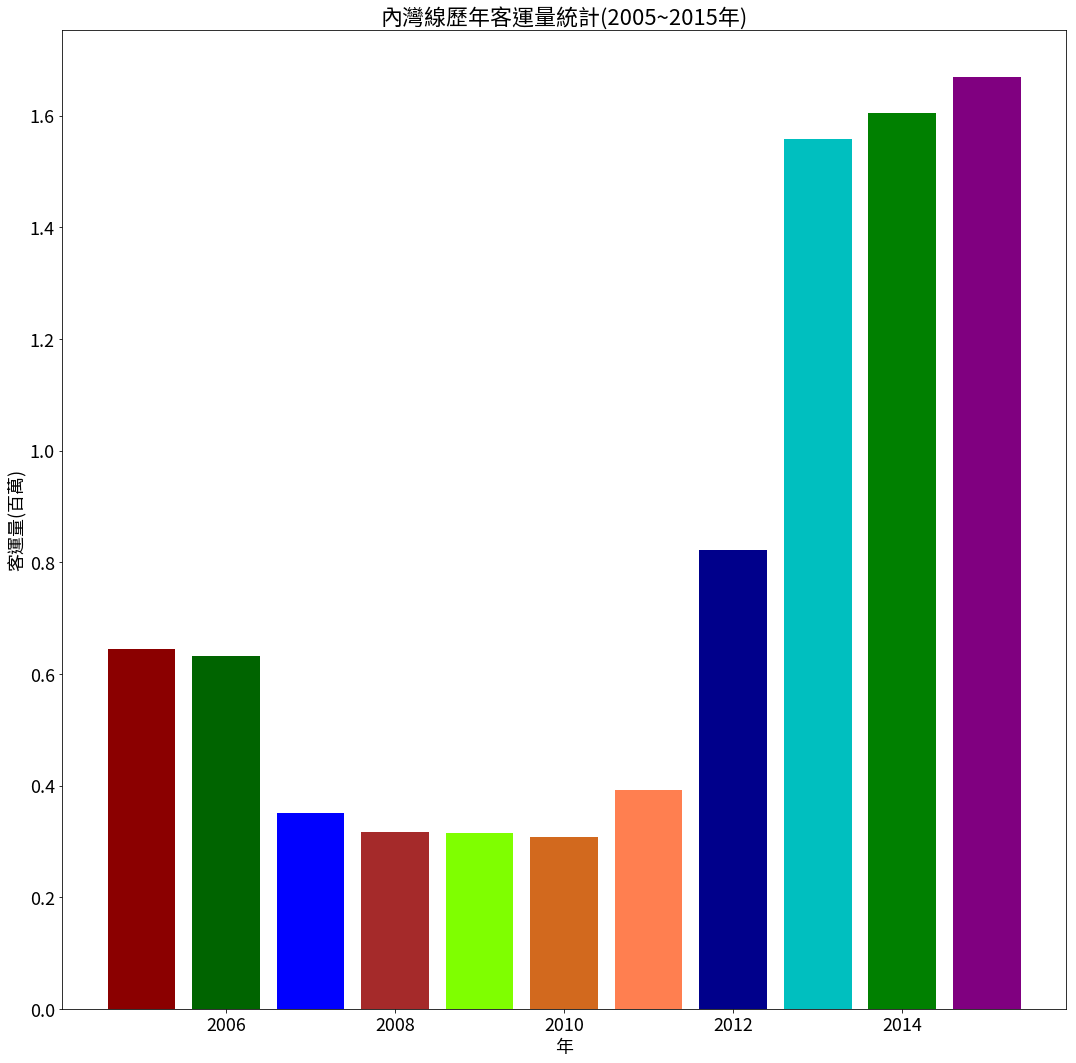

請按任意鍵返回選單0
---------------0.返回上一層------------------
 1.內灣線  2.六家線  3.北迴線  4.南迴線  5.宜蘭線 
 6.屏東線  7.平溪線  8.沙崙線  9.深澳線 10.縱貫線 
11.臺中線 12.臺東線 13.集集線 請選擇:0

---台鐵各線歷年客運量資訊---
A.台鐵各線歷年客運量統計(2005~2015年)
B.台鐵個別線歷年客運量統計(2005~2015年)
0.返回總目錄
請選擇欲查詢項目:0

返回總目錄



In [12]:
main()